참고문헌 :
- http://cs231n.stanford.edu/

# Simple practice for 2-layer Neural Network

## 1. 시뮬레이션 데이터 생성

In [1]:
# 필요한 패키지
import numpy as np
import scipy
import matplotlib.pyplot as plt

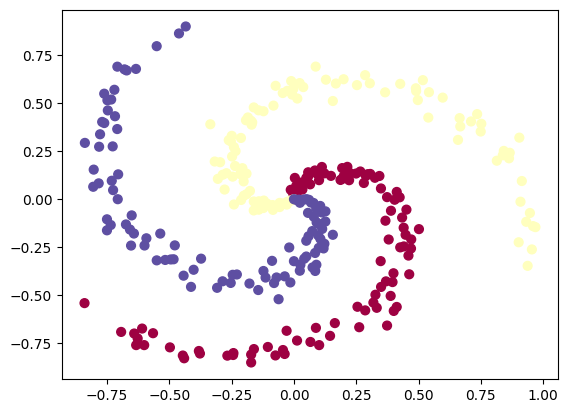

In [2]:
# 시드 지정 - random한 숫자를 생성할 때, 항상 동일한 결과가 나오도록 고정.
np.random.seed(seed=1)

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

X = np.zeros((N*K,D)) # data matrix (each row = single example) # 300 x 2 matrix
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1)) # j=0 : 1 ~ 100 / j=1 : 101 ~ 200 / j=2 : 201 ~ 300
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta

  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

- 밑의 그림과 같이 linearly separable하지 않은 3개의 class를 가진 데이터를 생성한다.
- Neural network를 통하여 nonlinear classifier를 학습한 이후에 성능을 테스트할 것이다.
- 일반적으로는 `X`의 각 차원을 normalization하는 것이 일반적이다. 즉, mean=0, sd=1로 맞춘 이후에 학습을 진행하는 것이 일반적이지만, 여기서는 생성한 데이터가 이미 -1과 1 사이에 잘 분포되어 있기 때문에 해당 과정을 스킵한다.

## 2. Softmax linear classifier 학습

### Softmax linear classifer

- score function : $$ f(x,W,b) = Wx + b $$
- loss function  : $$ L(W,b|x,y) = -\sum_{k=1}^{K}{y_k \log \left({ \exp(f_k) \over \sum_{g=1}^{K}{\exp(f_g)} }\right) } = - \log \left({ \exp(f_Y) \over \sum_{g=1}^{K}{\exp(f_g)} }\right) $$
- 따라서 training은 다음의 loss function을 최소화하는 $W,b$를 학습 : $$ L = {1 \over n}\sum_{i=1}^{n}{L(W,b|x_i,y_i)} + \lambda R(W) = {1 \over n}\sum_{i=1}^{n}{L(W,b|x_i,y_i)} + \lambda \sum_{k,l}^{}{W_{k,l}^2}  $$

---



In [3]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K)) # 1xK 배열 생성

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):

  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print("iteration %d: loss %f" %(i, loss))

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  dW += reg*W # regularization gradient

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.097564
iteration 10: loss 0.909508
iteration 20: loss 0.839366
iteration 30: loss 0.807456
iteration 40: loss 0.790850
iteration 50: loss 0.781405
iteration 60: loss 0.775695
iteration 70: loss 0.772087
iteration 80: loss 0.769731
iteration 90: loss 0.768152
iteration 100: loss 0.767073
iteration 110: loss 0.766323
iteration 120: loss 0.765796
iteration 130: loss 0.765420
iteration 140: loss 0.765151
iteration 150: loss 0.764956
iteration 160: loss 0.764815
iteration 170: loss 0.764711
iteration 180: loss 0.764635
iteration 190: loss 0.764579


In [4]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
scores
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.52


In [5]:
scores[0]

array([-0.03457277, -0.00924217,  0.04381494])

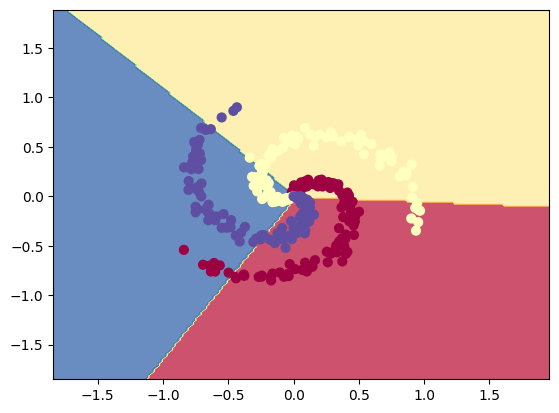

In [6]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

fig = plt.figure() # 새로운 figure를 생성
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [ ]:
Z

array([[2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1]])

In [ ]:
# generate test set
np.random.seed(seed=1000)

N_test = 100 # number of points per class
X_test = np.zeros((N_test*K,D)) # data matrix (each row = single example)
y_test = np.zeros(N_test*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N_test*j,N_test*(j+1))
  r = np.linspace(0.0,1,N_test) # radius
  t = np.linspace(j*4,(j+1)*4,N_test) + np.random.randn(N_test)*0.2 # theta
  X_test[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y_test[ix] = j

# evaluate test set accuracy
scores_test = np.dot(X_test, W) + b
predicted_class_test = np.argmax(scores_test, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_class_test == y_test)))

test accuracy: 0.51


## 3. Neural Network 학습 (3/31 5주-1 ~>)

- 2 layer Neural network (1-hidden layer)

In [9]:
[range(num_examples),y]

[range(0, 300),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2,

In [10]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h) # layer1 <-> layer2 사이 가중치 / D: dimension=2
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K) # layer2 <-> layer3 사이 가중치 / K: output dimension = 3
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):

  # evaluate class scores, [N x K]
  # z = np.dot(X,W)+b, a=f(z), f : np.maximum(0, z)

  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation # f(z) = max(0,z)
  scores = np.dot(hidden_layer, W2) + b2 # layer2->layer3로 스코어 계산

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K] : 매트릭스 차원 확인!

  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y]) # probs 는 행렬, 행렬 슬라이싱임.
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss # loss 그래프 그릴줄 알아야.
  if i % 1000 == 0:
    print("iteration %d: loss %f" % (i, loss))

  ## Backpropagation
  # compute the gradient on scores : layer3 에서 delta 값 구하는 과정 (요약본 2번 과정)
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples



  # backpropate the gradient to the parameters  : W_2, b_2 그래디언트 구하는과정. layer3의 delta와 layer의 activation 값 곱하는 과정.
  ## first backprop into parameters W2 and b2 (softmax)
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)



  ## next backprop into hidden layer : layer2에서 delta 값 구하는 과정
  dhidden = np.dot(dscores, W2.T)

  ## backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0



  ## finally into W,b : layer2 delta와 input layer x값 곱하는 과정.
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098714
iteration 1000: loss 0.288420
iteration 2000: loss 0.258252
iteration 3000: loss 0.246120
iteration 4000: loss 0.244535
iteration 5000: loss 0.244193
iteration 6000: loss 0.243993
iteration 7000: loss 0.243807
iteration 8000: loss 0.243690
iteration 9000: loss 0.243639


In [11]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.99


(-1.8515392815691603, 1.888460718430843)

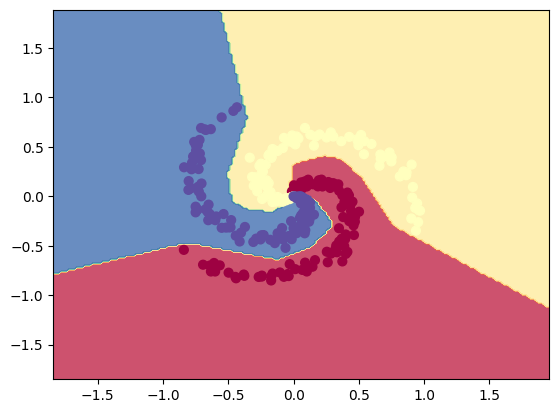

In [12]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')

In [ ]:
# generate test set
np.random.seed(seed=1000)

N_test = 100 # number of points per class
X_test = np.zeros((N_test*K,D)) # data matrix (each row = single example)
y_test = np.zeros(N_test*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N_test*j,N_test*(j+1))
  r = np.linspace(0.0,1,N_test) # radius
  t = np.linspace(j*4,(j+1)*4,N_test) + np.random.randn(N_test)*0.2 # theta
  X_test[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y_test[ix] = j

# evaluate test set accuracy
hidden_layer_test = np.maximum(0, np.dot(X_test, W) + b)
scores_test = np.dot(hidden_layer_test, W2) + b2
predicted_class_test = np.argmax(scores_test, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_class_test == y_test)))

test accuracy: 0.98


## 4. hyperparameter tuning

- 기존에는 lambda = 1e-3으로 고정해두고 계산했었음.

Neural network에 대해서
- training set, validation set, test set을 생성하고
- hyperparameter tuning을 한 이후에 (`step_size`는 고정. `reg`에 대해서만 튜닝할 것.)
- 최종적인 성능을 계산하라

In [13]:
# 필요한 패키지
import numpy as np
import scipy
import matplotlib.pyplot as plt

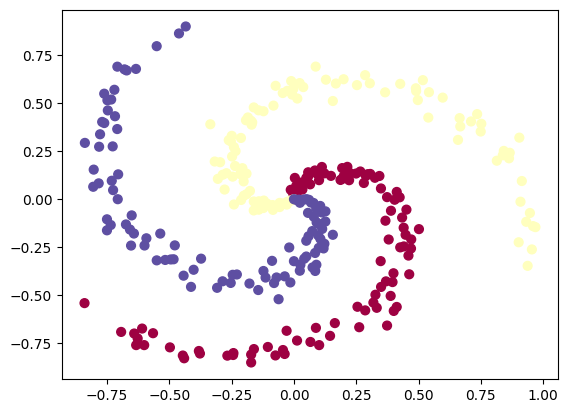

In [14]:
# training set
np.random.seed(seed=1)

N_tr = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X_tr = np.zeros((N_tr*K,D)) # data matrix (each row = single example)
y_tr = np.zeros(N_tr*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N_tr*j,N_tr*(j+1))
  r = np.linspace(0.0,1,N_tr) # radius
  t = np.linspace(j*4,(j+1)*4,N_tr) + np.random.randn(N_tr)*0.2 # theta
  X_tr[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y_tr[ix] = j

# lets visualize the data:
plt.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr, s=40, cmap=plt.cm.Spectral)
plt.show()

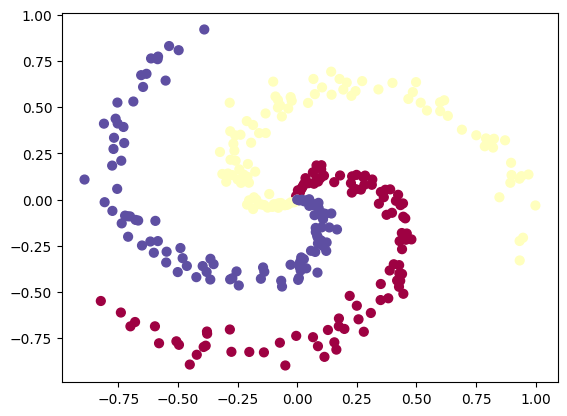

In [15]:
# validation set
np.random.seed(seed=10)

N_val = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X_val = np.zeros((N_val*K,D)) # data matrix (each row = single example)
y_val = np.zeros(N_val*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N_val*j,N_val*(j+1))
  r = np.linspace(0.0,1,N_val) # radius
  t = np.linspace(j*4,(j+1)*4,N_val) + np.random.randn(N_val)*0.2 # theta
  X_val[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y_val[ix] = j

# lets visualize the data:
plt.scatter(X_val[:, 0], X_val[:, 1], c=y_val, s=40, cmap=plt.cm.Spectral)
plt.show()

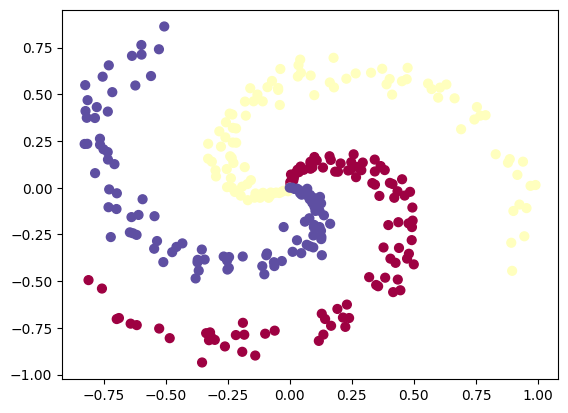

In [16]:
# test set
np.random.seed(seed=100)

N_te = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X_te = np.zeros((N_te*K,D)) # data matrix (each row = single example)
y_te = np.zeros(N_te*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N_te*j,N_te*(j+1))
  r = np.linspace(0.0,1,N_te) # radius
  t = np.linspace(j*4,(j+1)*4,N_te) + np.random.randn(N_te)*0.2 # theta
  X_te[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y_te[ix] = j

# lets visualize the data:
plt.scatter(X_te[:, 0], X_te[:, 1], c=y_te, s=40, cmap=plt.cm.Spectral)
plt.show()

In [17]:
# lambda = 0.001 / 0.01 / 0.1 / 1
## lambda = 0.001 -> validation accuracy1
## lambda = 0.01  -> validation accuracy2
## lambda = 0.1   -> validation accuracy3
## lambda = 1     -> validation accuracy4
### validation set에 대해 가장 좋은 accuracy를 가지는 lambda를 선택.

reg_vec = [1e-3, 1e-2, 0.1, 1]
reg_result = []

for reg in reg_vec:

  # neural network를 학습 ------------------------------------------------------(section 3 와 같은 코드)
  # initialize parameters randomly
  h = 100 # size of hidden layer
  W = 0.01 * np.random.randn(D,h)
  b = np.zeros((1,h))
  W2 = 0.01 * np.random.randn(h,K)
  b2 = np.zeros((1,K))

  # some hyperparameters
  step_size = 1e-0

  # gradient descent loop
  num_examples = X_tr.shape[0]
  for i in range(10000):

    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X_tr, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y_tr])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    if i % 1000 == 0:
      print("(reg = %f) iteration %d: loss %f" % (reg, i, loss))

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y_tr] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters
    ## first backprop into parameters W2 and b2 (softmax)
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)

    ## next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)

    ## backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0

    ## finally into W,b
    dW = np.dot(X_tr.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2
  # neural network를 학습 ------------------------------------------------------

  # evaluate validation set accuracy
  hidden_layer_val = np.maximum(0, np.dot(X_val, W) + b)
  scores_val = np.dot(hidden_layer_val, W2) + b2
  predicted_class_val = np.argmax(scores_val, axis=1)
  reg_result.append(np.mean(predicted_class_val == y_val))

(reg = 0.001000) iteration 0: loss 1.098541
(reg = 0.001000) iteration 1000: loss 0.311229
(reg = 0.001000) iteration 2000: loss 0.266817
(reg = 0.001000) iteration 3000: loss 0.247934
(reg = 0.001000) iteration 4000: loss 0.245919
(reg = 0.001000) iteration 5000: loss 0.245353
(reg = 0.001000) iteration 6000: loss 0.244984
(reg = 0.001000) iteration 7000: loss 0.244713
(reg = 0.001000) iteration 8000: loss 0.244375
(reg = 0.001000) iteration 9000: loss 0.244090
(reg = 0.010000) iteration 0: loss 1.098685
(reg = 0.010000) iteration 1000: loss 0.710997
(reg = 0.010000) iteration 2000: loss 0.710269
(reg = 0.010000) iteration 3000: loss 0.710226
(reg = 0.010000) iteration 4000: loss 0.710221
(reg = 0.010000) iteration 5000: loss 0.710208
(reg = 0.010000) iteration 6000: loss 0.710212
(reg = 0.010000) iteration 7000: loss 0.710178
(reg = 0.010000) iteration 8000: loss 0.710179
(reg = 0.010000) iteration 9000: loss 0.710188
(reg = 0.100000) iteration 0: loss 1.101145
(reg = 0.100000) itera

In [18]:
# lambda = ? -> acc 높은 lambda = 0.001 선택.
print(reg_result)
Reg = reg_vec[np.argmax(reg_result)]
Reg

[np.float64(0.98), np.float64(0.78), np.float64(0.53), np.float64(0.3333333333333333)]


0.001

In [19]:
# validation 셋 아까우니 train+validation해서 모든 데이터로 다시 학습 진행

# traing set + validation set
X = np.concatenate((X_tr,X_val),axis=0)
y = np.concatenate((y_tr,y_val))

In [20]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = Reg # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):

  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print("iteration %d: loss %f" % (i, loss))

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters
  ## first backprop into parameters W2 and b2 (softmax)
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)

  ## next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)

  ## backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0

  ## finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098595
iteration 1000: loss 0.300838
iteration 2000: loss 0.258338
iteration 3000: loss 0.252633
iteration 4000: loss 0.252958
iteration 5000: loss 0.252314
iteration 6000: loss 0.251586
iteration 7000: loss 0.251396
iteration 8000: loss 0.251267
iteration 9000: loss 0.251097


In [21]:
# evaluate test set accuracy
hidden_layer_test = np.maximum(0, np.dot(X_te, W) + b)
scores_test = np.dot(hidden_layer_test, W2) + b2
predicted_class_test = np.argmax(scores_test, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_class_test == y_te)))

test accuracy: 0.97


(-1.9355521912329907, 1.8444478087670126)

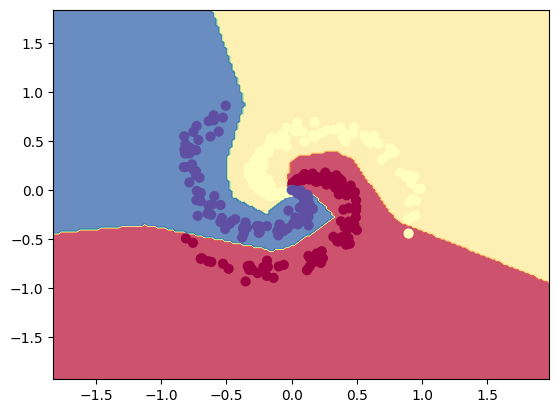

In [22]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X_te[:, 0].min() - 1, X_te[:, 0].max() + 1
y_min, y_max = X_te[:, 1].min() - 1, X_te[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_te[:, 0], X_te[:, 1], c=y_te, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')